# Image classifier using a MLP
We will build an image classifier with a MLP.

We use Fashion-MNIST, a dataset of Zalando's article images—consisting of a training set of 60,000 examples. 
and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a 
label from 10 classes. Each class represents an article of clothing 
(0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot).

<img src="img/fashion-mnist.png" width="600px"/>

# Imports
We import the required modules:

In [16]:
from keras.src.layers import Dense
from keras.src.optimizers import SGD
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import numpy as np
from utils import show_history

# Data preparation
We load the iris dataset. Then we create the X (independent variables) and y (dependent variable) dataframes.
Finally, `iris_df` holds both X and y in the same dataframe.

In [17]:
# Load Iris Data
iris = load_iris()
# Creating pd DataFrames
X_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y_df = pd.DataFrame(data=iris.target, columns=['species'])
iris_df = pd.concat([X_df, y_df], axis=1)

Let's take a look at the dataset distribution:

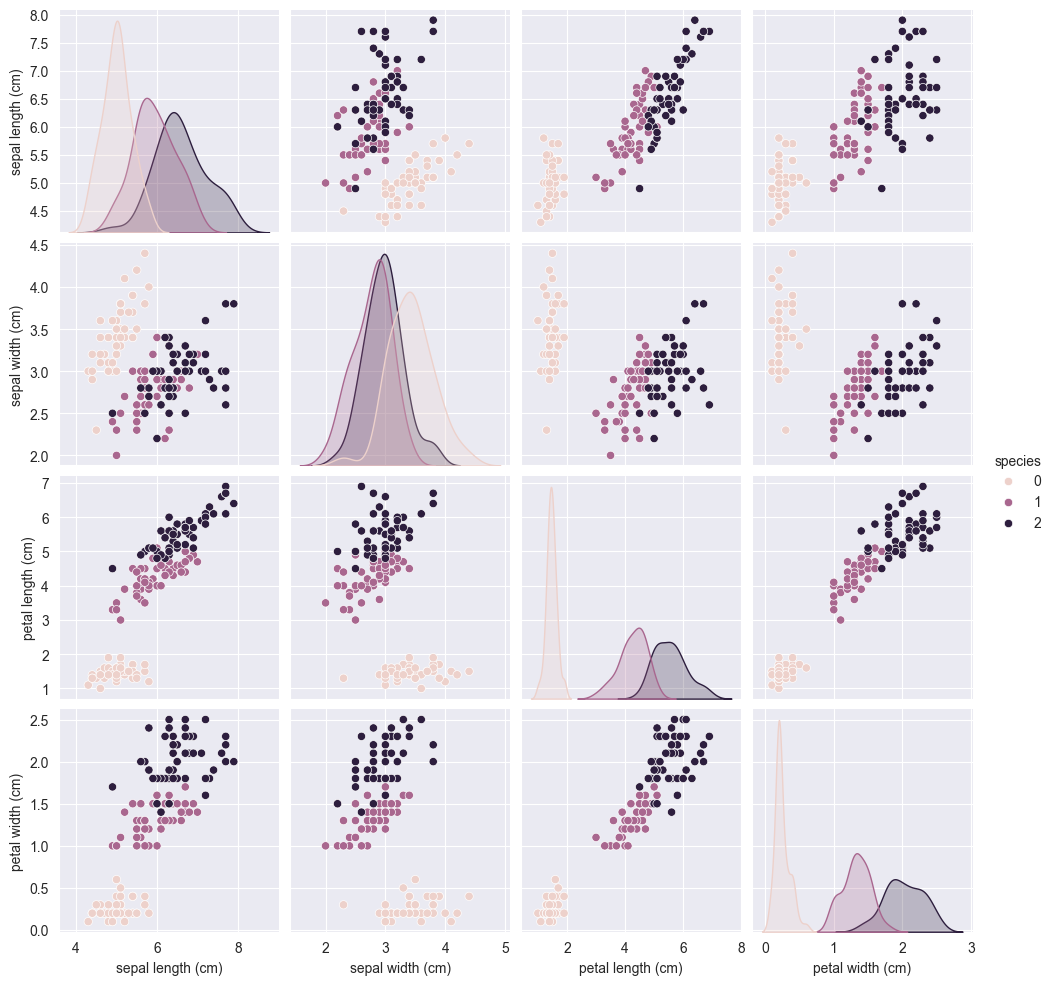

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [18]:
sns.pairplot(iris_df, hue='species')
plt.show()
print(iris_df.describe())

We now change the species target variable. 
Instead of three values, we just want to know whether it is virginica (1) or not (0).
Recall, our classifier is binary.

In [19]:
# We will classify whether it is virginica or not (binary classification)
iris_df['species'] = iris_df['species'].apply(lambda specie: 1 if specie == 2 else 0)  # 2 = virginica
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    0.333333  
std            0.762238    0.472984  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    0.000000  
75%            1.800000    1.000000  
max            2.500000    1.000000  


We now divide the dataset into X and y. 
Then, we split the dataset in 80% train and 20% test.

In [20]:
# X is the dataset without the target variable (species)
X = iris_df.drop(labels='species', axis=1)
# y is species
y = iris_df['species']
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Neural network
A simple neuron is created with 4 inputs and 1 output. 
A sigmoid activation function is required because we have a binary classifier.
The network has one single neuron with 5 parameters: 4 input weights + the bias (b).
All the parameters all trainable (learned) from data.

In [21]:
model = Sequential()
model.add(Dense(1, input_dim=4, activation='sigmoid'))
model.summary()  # params=5 (4 weights for inputs + bias)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will use binary cross entropy as the loss function, since we are building a binary classifier. 
For optimization, we use Stochastic Gradient Descent (SGD).
We want to be prompted loss (binary cross entropy) and accuracy. 

In [22]:
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

We now train the model (learn the parameters) for 50 epochs. 

In [23]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 0.8388 - accuracy: 0.3750
Epoch 2/50
4/4 [==============================] - 0s 0s/step - loss: 0.7502 - accuracy: 0.4667
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7172 - accuracy: 0.4917
Epoch 4/50
4/4 [==============================] - 0s 0s/step - loss: 0.7041 - accuracy: 0.5167
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5667
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.5667
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5833
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6083
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.6083
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6000
Epoch 11/50
4/4 [========================

Let's plot the training loss and accuracy for the training dataset:

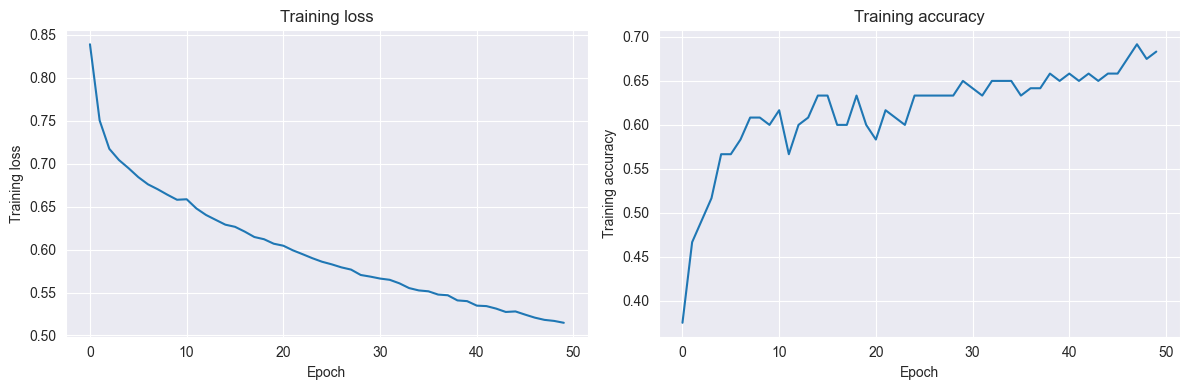

In [24]:
show_history(history, loss_label='Training loss', accuracy_label='Training accuracy')

## Prediction
We apply the neural network to the test dataset (forward propagation).
That returns the probabilities of being viginica.
Then, we compute the class (virginica or not) by using 0.5 as a threshold.

In [25]:
prediction_probabilities = model.predict(X_test, verbose=0)
prediction = np.vectorize(lambda x: 1 if x > 0.5 else 0)(prediction_probabilities)

### Assessment
We show accuracy and F1-score for the test set.

In [26]:
print('Accuracy:', accuracy_score(y_test, prediction))
print('F1-score:', f1_score(y_test, prediction))

Accuracy: 0.8333333333333334
F1-score: 0.7368421052631577


# Questions

1. Why is the F1-score lower than accuracy?
2. Do you think the model's performance could be improved by increasing the number of epochs?
   Could it worsen it because of overfitting? Try it out.

# Answers

1. Because the dataset is not balanced and accuracy overestimates the performance of unbalanced datasets.
2. Yes it seems that loss and accuracy could be improved.
  It has no overfitting (accuracy of test is improved) because the network is not complex enough to
  memorize the data.